In [4]:
%pylab inline 
import yt 
yt.funcs.mylog.setLevel(50) #coerce output null
import matplotlib.cm as cm 
from matplotlib.colors import LogNorm

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [12]:
G = 6.67e-8 #cgs
a = 28730.5 #cm/s

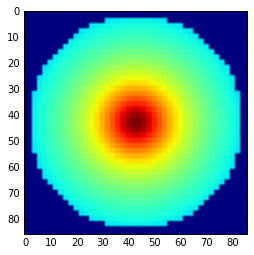

In [6]:
i =0 
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
lev = 5
dim = 2**(lev+3)
all_data = ds.covering_grid(level=lev, left_edge=[0,0.0,0.0],dims=[dim,dim,dim])
dens_arr =  np.array(all_data["density"])

margin = dim/3
start  = margin
end = dim-margin
plt.imshow(dens_arr[start:end,dim/2,start:end],cmap=cm.jet,norm=LogNorm())
cell_size = int((ds.domain_width/dim)[0].in_cgs())

In [7]:
print end-start
print "looping through: ", (end-start)**3

86
looping through:  636056


In [ ]:
# xi_range = np.logspace(-3,5)
xi_range = np.logspace(0,50,num=10)
r_range = xi_range/1.057E-17
#let dr = cell_size 
rcloud =1.59886e18 #xi = 16.90 (/1.057E-17 conv factor) 
xyzrange = np.arange(start,end)
sum_args_list = []
for ri in r_range:
    sum_args = 0
    for i in xyzrange:
        for j in xyzrange: 
            for k in xyzrange: 
                print r
                r = sqrt(i**2+j**2+k**2)*cell_size
    #             if rr< rcloud:
                if np.isclose(r,ri,atol=cell_size):
                    print "inside:" , r
                    sum_args+=r**2*dens_arr[i][j][k]*cell_size
    sum_args_list.append(sum_args)
sum_args_list = np.array(sum_args_list)

1.1501899894e+19
5.75094994701e+18
5.77359078788e+18
5.79640644164e+18
5.81939485216e+18
5.84255398021e+18
5.86588180378e+18
5.88937631825e+18
5.91303553666e+18
5.93685748991e+18
5.96084022693e+18
5.98498181486e+18
6.00928033922e+18
6.03373390399e+18
6.0583406318e+18
6.08309866396e+18
6.10800616059e+18
6.13306130069e+18
6.15826228217e+18
6.18360732192e+18
6.20909465585e+18
6.23472253887e+18
6.26048924493e+18
6.28639306701e+18
6.31243231709e+18
6.33860532613e+18
6.36491044406e+18
6.3913460397e+18
6.41791050072e+18
6.44460223359e+18
6.47141966348e+18
6.49836123422e+18
6.52542540819e+18
6.55261066621e+18
6.57991550751e+18
6.60733844954e+18
6.63487802792e+18
6.6625327963e+18
6.69030132624e+18
6.71818220711e+18
6.74617404592e+18
6.7742754672e+18
6.80248511288e+18
6.83080164214e+18
6.85922373125e+18
6.88775007344e+18
6.91637937876e+18
6.94511037389e+18
6.97394180201e+18
7.00287242265e+18
7.03190101153e+18
7.06102636036e+18
7.09024727674e+18
7.11956258395e+18
7.14897112079e+18
7.17847174146e+

In [21]:
r_range

array([  9.46073794e+16,   3.40001293e+22,   1.22190129e+28,
         4.39128556e+33,   1.57814620e+39,   5.67156339e+44,
         2.03825420e+50,   7.32510580e+55,   2.63250653e+61,
         9.46073794e+66])

In [15]:
float(cell_size)

3.90625e+16

In [22]:
sum_args_list

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

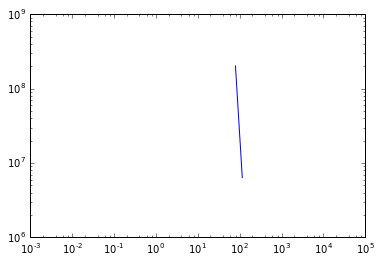

In [13]:
plt.loglog(xi_range,4*pi*G*sum_args_list/rcloud/a)